In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import csv
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.patches as patches
import random

def rotation(img, n):
    rotate=iaa.Affine(rotate=(-n, n))
    rotated_image=rotate.augment_image(img)
    return rotated_image

def crop(img, n):
    crop = iaa.Crop(percent=(n, n)) # crop image
    crop_image=crop.augment_image(img)
    return crop_image

def sheer(img, n):
    shear = iaa.Affine(shear=(-n,n))
    shear_image=shear.augment_image(img)
    return shear_image

def hor_flip(img):
    flip_hr=iaa.Fliplr(p=1.0)
    flip_hr_image= flip_hr.augment_image(img)
    return flip_hr_image

def dilate(img, n):
    kernel = np.ones((n,n),np.uint8)
    dilated_image = cv2.dilate(trainxs[800],kernel,iterations = 1)
    return dilate_image

def trans(img, n):
    num = random.randrange(int(n*-1),int(n))
    move=iaa.Affine(translate_percent={"x": num/100}, scale=1)
    trans_image = move.augment_image(img)
    return trans_image




    

In [2]:
trainxs = []
trainys = []
trainxs2 =[]
with open("/home/jupyter/MEng-Project/insight46labels.csv", newline='') as csvfile:
    data = list(csv.reader(csvfile))
    trainystr = data[0]
trainys = [int(i) for i in trainystr]
#print(trainys)

In [3]:
path = "/home/jupyter/MEng-Project/insight46png"
for img in tqdm(sorted(os.listdir(path))):  # iterate over each image per point value
    img_array = cv2.imread(os.path.join(path,img) ,0)  # convert to array
    img_array = cv2.resize(img_array, (300, 300))
    img_array = cv2.bitwise_not(img_array)
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(img_array,kernel,iterations = 1)
    trainxs.append(dilate)  # add this to our training_data
    #trainxs.append(img_array)
#trainxs = np.array(trainxs, dtype="float") / 255.0
#trainys = np.array(trainys)

100%|██████████| 991/991 [00:05<00:00, 194.84it/s]


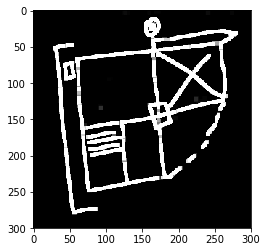

In [4]:
plt.imshow(trainxs[1], "gray")

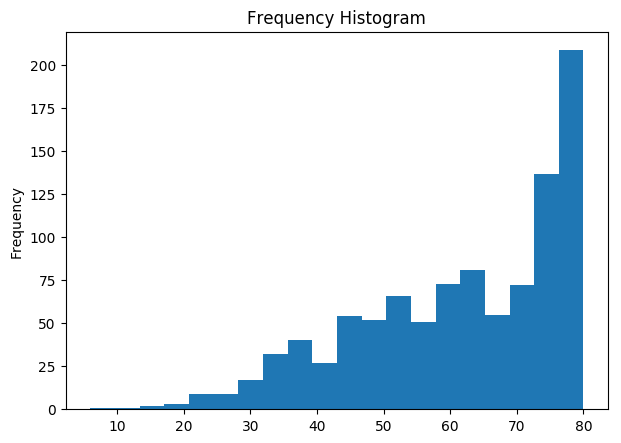

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(trainys, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [6]:
for i,y in enumerate(trainys):
    if trainys[i] > 70:
        trainys[i] = 5
    elif trainys[i] <=70 and trainys[i] >60:
        trainys[i] = 4
    elif trainys[i] <=60 and trainys[i] >50:
        trainys[i] = 3
    elif trainys[i] <=50 and trainys[i] >40:
        trainys[i] = 2
    elif trainys[i] <=40 and trainys[i] >30:
        trainys[i] = 1
    else:
        trainys[i] = 0


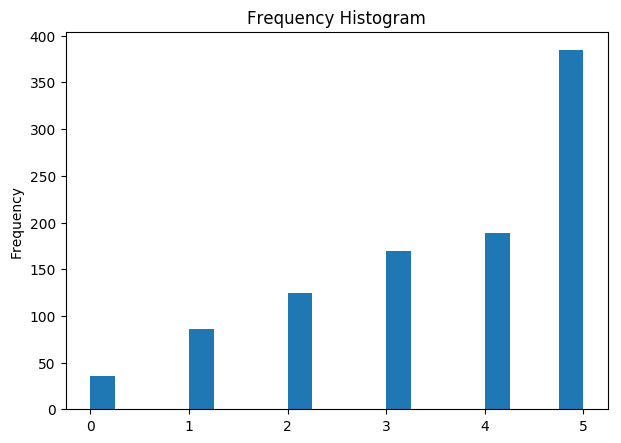

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(trainys, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [8]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

batch_size = 32
epochs = 15

# input image dimensions
img_rows, img_cols = 300, 300


import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=np.inf)


trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.int)
#print(trainys)



x_train, x_test, y_train_old, y_test_old = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=40)
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)


Using TensorFlow backend.


In [160]:
for i,y in enumerate(x_train):
    if y_train_old[i] == 4:
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
    if y_train_old[i] == 3:
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        
    if y_train_old[i] == 2:
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        new_img_array3 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array3 = np.asarray(new_img_array3, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array3[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
    if y_train_old[i] == 1:
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        new_img_array3 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array3 = np.asarray(new_img_array3, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array3[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array4 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array4 = np.asarray(new_img_array4, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array4[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
    
    if y_train_old[i] == 0:
        
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array3 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array3 = np.asarray(new_img_array3, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array3[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array4 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array4 = np.asarray(new_img_array4, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array4[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        new_img_array5 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array5 = np.asarray(new_img_array5, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array5[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array6 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array6 = np.asarray(new_img_array6, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array6[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array7 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array7 = np.asarray(new_img_array7, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array7[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array8 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array8 = np.asarray(new_img_array8, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array8[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        new_img_array9 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array9 = np.asarray(new_img_array9, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array9[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array10 = trans(rotate(crop(x_train[i], 0.1),30), 10)
        new_img_array10 = np.asarray(new_img_array10, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array10[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        


In [161]:
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)
x_train.shape

(2215, 300, 300)

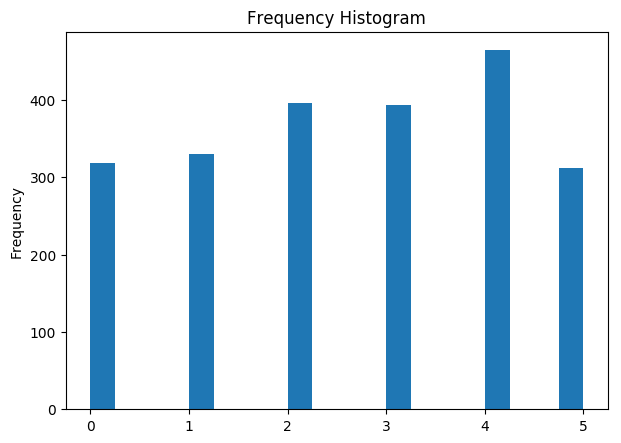

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(y_train_old, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [163]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(2215, 300, 300, 1)

In [164]:
from sklearn.utils import class_weight
print('x_train shape:', x_train.shape)
x_train = np.array(x_train)
x_test = np.array(x_test)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (2215, 300, 300, 1)


In [173]:

print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
class_weight = {0: 2.,
                1: 2.,
                2: 2.,
                3: 2,
                4: 2.,
                5: 1.}

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(356, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

y_train shape: (2215, 6)
2215 train samples
199 test samples
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 298, 298, 32)      320       
_________________________________________________________________
average_pooling2d_33 (Averag (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
average_pooling2d_34 (Averag (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 35, 35, 128)       0         
__________________________________________________________

In [174]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
                    #, class_weight=class_weight)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2215 samples, validate on 199 samples
Epoch 1/15
2215/2215 [==============================] - 17s 8ms/step - loss: 1.7475 - accuracy: 0.2244 - val_loss: 1.4703 - val_accuracy: 0.4171
Epoch 2/15
2215/2215 [==============================] - 16s 7ms/step - loss: 1.5717 - accuracy: 0.3169 - val_loss: 1.3252 - val_accuracy: 0.4422
Epoch 3/15
2215/2215 [==============================] - 16s 7ms/step - loss: 1.4060 - accuracy: 0.3937 - val_loss: 1.2004 - val_accuracy: 0.4523
Epoch 4/15
2215/2215 [==============================] - 16s 7ms/step - loss: 1.2543 - accuracy: 0.4700 - val_loss: 1.2118 - val_accuracy: 0.4824
Epoch 5/15
2215/2215 [==============================] - 16s 7ms/step - loss: 1.0976 - accuracy: 0.5427 - val_loss: 1.2718 - val_accuracy: 0.4673
Epoch 6/15
2215/2215 [==============================] - 16s 7ms/step - loss: 1.0062 - accuracy: 0.5977 - val_loss: 1.1308 - val_accuracy: 0.5075
Epoch 7/15
2215/2215 [==============================] - 16s 7ms/step - loss: 0.8855

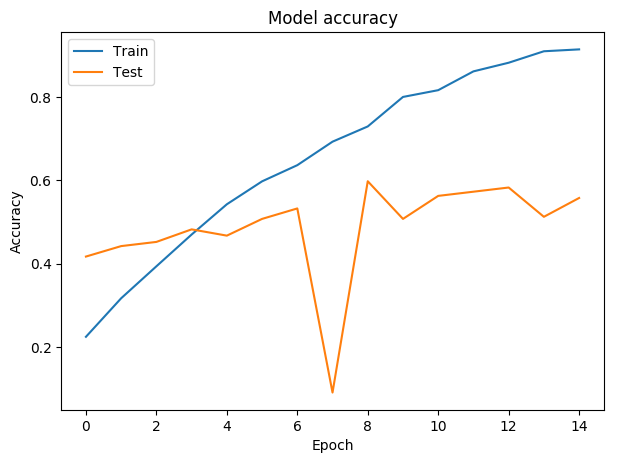

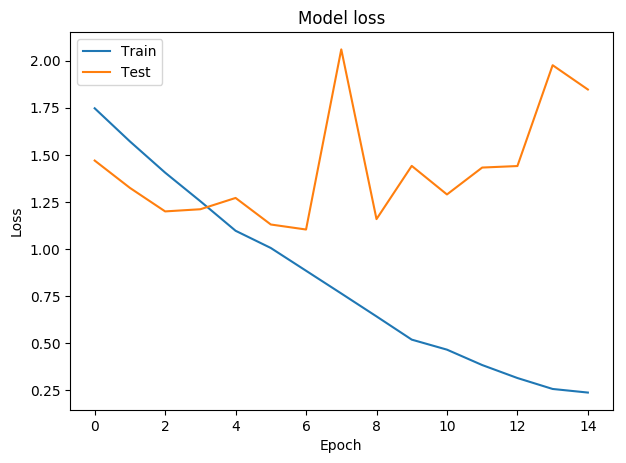

In [175]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [176]:
pred = model.predict_classes(x_test)

In [177]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix


#cm=confusion_matrix(y_test_old,pred, normalize='true')
cm=confusion_matrix(y_test_old, pred)
print(cm)

[[ 0  3  3  1  0  0]
 [ 1  6  5  6  2  0]
 [ 2  3 14  3  4  0]
 [ 0  1  3 14 14  7]
 [ 0  0  1  5 10 18]
 [ 0  0  0  1  5 67]]


In [178]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(f1_score(y_test_old, pred, average='weighted'))
print(precision_score(y_test_old, pred, average='weighted'))
print(recall_score(y_test_old, pred, average='weighted'))

0.5338629908435458
0.5241612986096272
0.5577889447236181


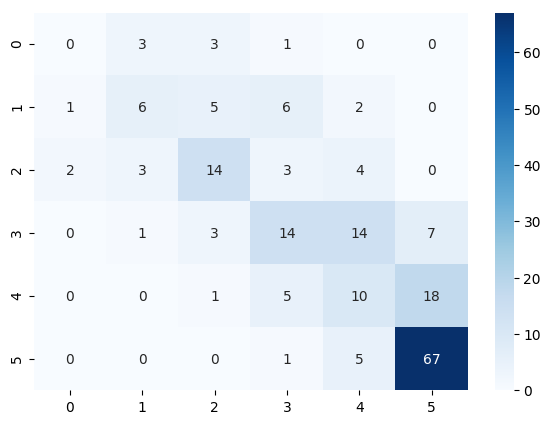

In [179]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm,annot=True,cmap='Blues', fmt='g')

In [79]:
trainxs = []
trainys = []


with open("/home/jupyter/MEng-Project/insight46labels.csv", newline='') as csvfile:
    data = list(csv.reader(csvfile))
    trainystr = data[0]
trainys = [int(i) for i in trainystr]
#print(trainys)


path = "/home/jupyter/MEng-Project/insight46png"
for img in tqdm(sorted(os.listdir(path))):  # iterate over each image per point value
    img_array = cv2.imread(os.path.join(path,img) ,0)  # convert to array
    img_array = cv2.resize(img_array, (300, 300))
    img_array = cv2.bitwise_not(img_array)
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(img_array,kernel,iterations = 1).flatten()
    trainxs.append(dilate)  # add this to our training_data
    #trainxs.append(img_array)
#trainxs = np.array(trainxs, dtype="float") / 255.0
#trainys = np.array(trainys)
'''
for i,y in enumerate(trainys):
    if trainys[i] > 60:
        trainys[i] = 2
    elif trainys[i] <=60 and trainys[i] >40:
        trainys[i] = 1
    else:
        trainys[i] = 0
'''
for i,y in enumerate(trainys):
    if trainys[i] > 70:
        trainys[i] = 5
    elif trainys[i] <=70 and trainys[i] >60:
        trainys[i] = 4
    elif trainys[i] <=60 and trainys[i] >50:
        trainys[i] = 3
    elif trainys[i] <=50 and trainys[i] >40:
        trainys[i] = 2
    elif trainys[i] <=40 and trainys[i] >30:
        trainys[i] = 1
    else:
        trainys[i] = 0

x_train, x_test, y_train_old, y_test_old = train_test_split(trainxs, trainys, test_size=0.2, random_state=42)

x_train = np.array(x_train)
x_test = np.array(x_test)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#import necessary modules

    


100%|██████████| 991/991 [00:04<00:00, 215.91it/s]


In [80]:
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)

In [76]:
from keras import optimizers
dim_img = img_rows * img_cols
x_train = x_train.reshape(x_train.shape[0], dim_img)
x_test = x_test.reshape(x_test.shape[0], dim_img)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_img,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))


sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 792 samples, validate on 199 samples
Epoch 1/15
792/792 [==============================] - 1s 1ms/step - loss: 0.8497 - accuracy: 0.6061 - val_loss: 0.6014 - val_accuracy: 0.7337
Epoch 2/15
792/792 [==============================] - 1s 1ms/step - loss: 0.5760 - accuracy: 0.7298 - val_loss: 0.6789 - val_accuracy: 0.7236
Epoch 3/15
792/792 [==============================] - 1s 1ms/step - loss: 0.3976 - accuracy: 0.8447 - val_loss: 0.6333 - val_accuracy: 0.7387
Epoch 4/15
792/792 [==============================] - 1s 1ms/step - loss: 0.2615 - accuracy: 0.9078 - val_loss: 0.9644 - val_accuracy: 0.6683
Epoch 5/15
792/792 [==============================] - 1s 1ms/step - loss: 0.1603 - accuracy: 0.9470 - val_loss: 0.7846 - val_accuracy: 0.7286
Epoch 6/15
792/792 [==============================] - 1s 1ms/step - loss: 0.0804 - accuracy: 0.9722 - val_loss: 0.8729 - val_accuracy: 0.7286
Epoch 7/15
792/792 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9735 - 

In [77]:
pred = model.predict_classes(x_test)

In [82]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(precision_score(y_test_old, pred, average='weighted'))
print(recall_score(y_test_old, pred, average='weighted'))
print(f1_score(y_test_old, pred, average='weighted'))

0.5138763847247442
0.507537688442211
0.5056949006697751


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#print(x_train)
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=8)
#Train the algorithm
neigh.fit(x_train, y_train_old)
# predict the response
pred = neigh.predict(x_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_old, pred))

# import the necessary packages

KNeighbors accuracy score :  0.48743718592964824


In [81]:
from sklearn.svm import SVC


svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train_old) 
pred = svm_model_linear.predict(x_test) 

  
# creating a confusion matrix 
#cm = confusion_matrix(y_test_old, svm_predictions) 
print ("svm accuracy score : ", svm_model_linear.score(x_test, y_test_old) )

svm accuracy score :  0.507537688442211


In [70]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 


dtree_model = DecisionTreeClassifier(max_depth = 100).fit(x_train, y_train_old) 

pred = dtree_model.predict(x_test) 

print ("Decision Tree accuracy score : ",accuracy_score(y_test_old, pred))

Decision Tree accuracy score :  0.6180904522613065


In [72]:
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=10, max_depth=15, random_state=0)
gb_clf.fit(x_train, y_train_old)
pred = gb_clf.predict(x_test)
# evaluate accuracy
print ("Gradient Boosted Classifier accuracy score : ",accuracy_score(y_test_old, pred))

Gradient Boosted Classifier accuracy score :  0.6683417085427136
